# Heart Disease Dataset

    · Aymane El Hanbali Halloum
    · Marc Coca Moreno
    · Melania Prado Gutierrez
    · Siddique Muhammad  

# Introducción

Este trabajo tiene por objetivo exponer los resultados principales del análisis del juego de datos **Heart Disease Dataset**. Originalmente, el dataset puede encontrarse en el repositorio *UCI Machine Learning Repository*:

· https://archive.ics.uci.edu/ml/datasets/heart+disease

Para la práctica, se ha utilizado la versión simplificada de Kaggle:

· https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

El trabajo se divide en dos grandes partes: (1) el -presente- documento introductorio, donde se explica qué contiene el dataset y la limpieza inicial y (2) los documentos individuales donde cada uno de los miembros del grupo formulan 3 preguntas y las contestan de forma visual.

A continuación, se pasan a responder las preguntas de la práctica y la limpieza de los datos

# Importación del Dataset

## Contexto: ¿qué son estos datos? Pon referencias

El dataset, originalmente publicado en 1988 por Andras Janosi et al., es una base de datos que tiene por objetivo clasificar los individuos observados entre si presentan o no algun tipo de enfermedad en el corazón.

Es un juego de datos ya clásico y modelo del que se han derivado multitud de investigaciones y experimentos docentes. Pueden verse los resultados de los autores en:

    · Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304-310.

    · David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database"

    · Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11-61.

Las definiciones pueden encontrarse en las páginas referenciadas en el apartado anterior.

## Explicar las columnas

La base de datos se estructura a nivel de persona (una fila/registro, una persona) y la variable objetivo és 'target', que muestra un 0 si no tiene ninguna enfermada o 1 en caso contrario. Originalmente, la variable objetivo presentava 5 valores ordinales en función de la gravedad: 0 si no había ninguna enfermedad y 1-4 según enfermedad y riesgo.

Los datos aquí utilizados (heart.csv) presentan la siguiente estructura: 1.025 registros por 14 variables.

Las variables son:

| Variable | tipo | Definición |
| --- | --- | --- |
| age | entero (int) | Edad del individuo en el momento del registro |
| sex | binaria/categórica (int)| Sexo del individuo en el momento del registro: 0 para mujeres, 1 para hombres |
| cp | categórica (int) | dolor torácico (4 valores ordinales): angina típica (0), angina atípica (1), dolor torácico no anginoso (2), asintomático (3) |
| trestbps | entero (int) | presión arterial en reposo
| chol | entero (int) | colesterol sérico en mg/dl |
| fbs | binaria/categórica (int) | Azúcar en sangre en ayunas > 120 mg/dl: verdarero (1), falso (0) | 
| restecg | categórica ordinal (de mejor a peor) (int) | resultados electrocardiográficos en reposo: normal (0), anormalidad de onda ST-T (1), hipertrofia ventricular probable o definitiva (2) | 
| thalach | entero (int) | frecuencia cardíaca máxima alcanzada |
| exang | binaria/categórica (int) | angina inducida por el ejercicio: 0 no, 1 sí |
| oldpeak | numérico (float) | descenso del segmento ST inducido por el ejercicio (mayor el valor, peor el pronóstico) | 
| slope | categórica (int) | pendiente del segmento ST en el pico del ejercicio (esfuerzo): 0 ascendente, 1 estanco, 2 descendente
| ca | entero (int) | principales vasos del corazón destacados por fluorescencia | 
| thal | categórico (int) | thalasemia: 1 normal, 2 defecto crónico, 3 reversible.
| **target** | binaria/categórica (int) | 0 no presenta coronariopatía y 1 sí presenta

## ¿Cuantas filas hay?

La siguiente función devuelve el número de filas del juego de datos

In [1]:
from scripts.marc.ex1 import n_rows

n_rows("heart.csv")

1025

## ¿Hay NAs?

A continuación, se pasa a investigar si existen valores NAs

In [1]:
from scripts.marc.ex1 import count_na_by_col

count_na_by_col("heart.csv")

# Reading file...
# Counting NaN values by col..
# ...age: 0 NaN values
# ...sex: 0 NaN values
# ...cp: 0 NaN values
# ...trestbps: 0 NaN values
# ...chol: 0 NaN values
# ...fbs: 0 NaN values
# ...restecg: 0 NaN values
# ...thalach: 0 NaN values
# ...exang: 0 NaN values
# ...oldpeak: 0 NaN values
# ...slope: 0 NaN values
# ...ca: 0 NaN values
# ...thal: 0 NaN values
# ...target: 0 NaN values
--------------------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Perfecto, el juego de datos tiene todas las variables informadas.

# Arreglar el dataset

## ¿El dataset está en formato tidy?

En este caso, sí, el dataset se encuentra estructurado en formato tidy: cada fila representa la observación de interés (el individuo) y cada columna una variable asociada a el. No existen ni duplicados, ni variables repetitivas por valores.

Cada observación es única.

## Arreglos adicionales: etiquetas

Si bien el dataset dispone de una estructura y calidad perfecta, para análisis posteriores y gráficas finales, resulta de interés agregar las etiquetas a las distintas variables categóricas.

En este apartado, se recupera el dataset original y se cambian los valores de las variables no numéricas al concepto que le corresponde según la tabla de definiciones que se ha realizado anteriormente.

El resultado es el archivo **heart_labels.csv**.

In [1]:
from scripts.marc.ex2 import rename_categorical_vars
from pandas import DataFrame

heart_labels: DataFrame = rename_categorical_vars("heart.csv")
heart_labels.to_csv("data/heart_labels.csv", index=False, sep=",", decimal=".")

# Changing sex variable...
# Changing cp variable...
# Changing fbs variable...
# Changing restecg variable...
# Changing exang variable...
# Changing slope variable...
# Changing thal variable...
# Changing target variable...


# Outliers e inconsistencias

En este apartado pasamos a investigar si existen inconsistencias en los datos, así como valors atípicamente extremos que puedan perjudicar el análisis.

## Outliers

Para identificar los outliers se utilizará la técnica clásica del boxplot: se considerará outlier (X) aquel valor que esté por encima o debajo del valor: 

$$Q1-1.5*IQR<X>Q3+1.5*IQR$$

Este procedimiento sólo afecta a las variables numéricas.

Primero, se obtiene el recuento de observacions atípicas por variable numérica

In [2]:
from scripts.marc.ex3 import get_outliers_count

get_outliers_count("heart_labels.csv")

   age  trestbps  chol  thalach  oldpeak  ca
0    0        30    16        4        7  87


Se observa como, por ejemplo, la edad no presenta ningún valor atípico. La que más disparidad registra es 'ca': principales vasos del corazón destacados por fluorescencia.

Ahora, pasamos a visualizar estos datos mediante boxplot.

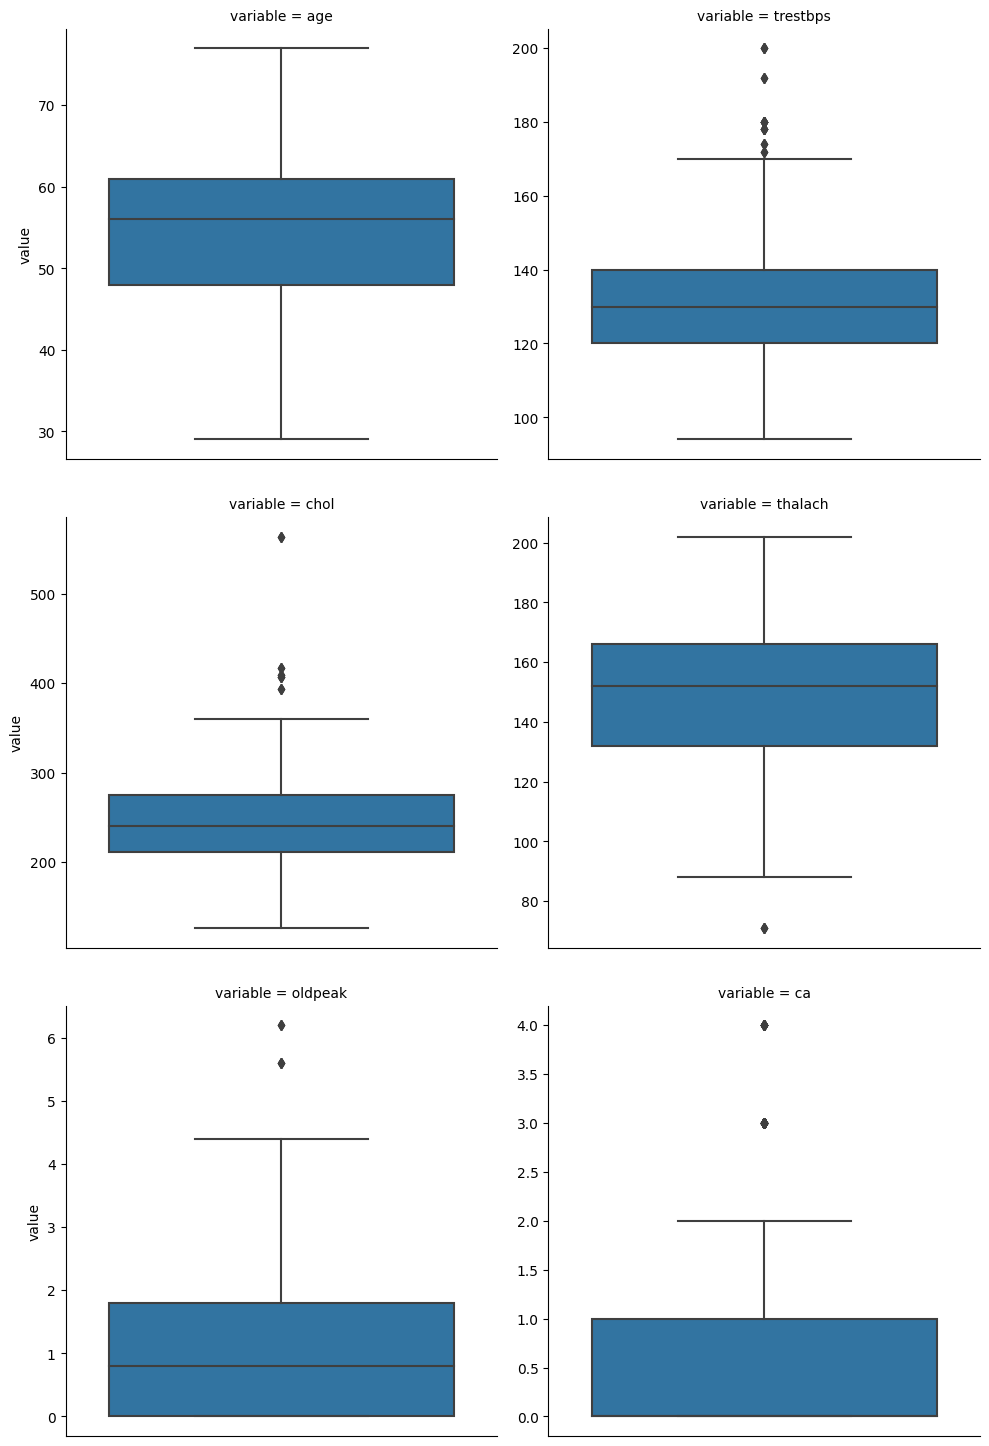

In [1]:
from scripts.marc.ex3 import facet_boxplots

facet_boxplots("heart_labels.csv")

Con todo ello, podemos ver como los valors más extremos se centran en las categorías de medidas físicas, como la presión arterial y, tambén, en ca. La variable ca, no obstante, es un recuento donde muchos valores son 0 y, por lo tanto, es de esperar una sobredetección de valores extremos.

En cualquier caso, se decide no eliminar ninguna observación.

# conclusiones

En este apartado introductorio se ha analizado el juego de datos inicial, se han etiquetado aquellas variables categóricas y, finalmente, se ha comprobado la consistencia de las variables numéricas.

Finalmente, se procede a realizar el archivo final.

In [1]:
from scripts.marc.ex2 import rename_categorical_vars
from pandas import DataFrame

heart_clean: DataFrame = rename_categorical_vars("heart.csv")
heart_clean.to_csv("data/heart_clean.csv", index=None, decimal=".")

# Changing sex variable...
# Changing cp variable...
# Changing fbs variable...
# Changing restecg variable...
# Changing exang variable...
# Changing slope variable...
# Changing thal variable...
# Changing target variable...


>